In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score

## Data visualization 

In [2]:
data = pd.read_csv("train.csv")
print('Data shape :', data.shape)

Data shape : (891, 12)


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# Check where are NaN values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<ul>
    <li>77% of the values are missing in Cabin, we'll remove it later</li>
    <li>Only two values are missing in Embarked, we can fill it with the most frequent one</li>
    <li>177 values are missing in age, we'll fill it with median value</li>
<ul>

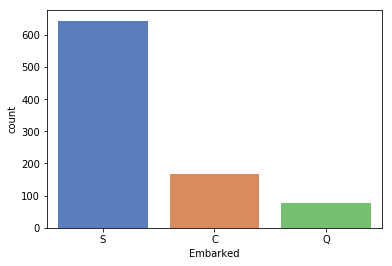

In [7]:
sns.countplot(data['Embarked'], palette = 'muted');

In [8]:
# Fill NaN values for Embarked column with the most frequent value
data["Embarked"] = data["Embarked"].fillna("S")

# Replace NaN value with median age
data['Age'] = data['Age'].fillna(data['Age'].median())

In [9]:
# Convert column to string for more visibility
data['Survived'] = data['Survived'].map({0: 'Died',1: 'Survived'})

In [10]:
# Remove some features, NB Name could be use for person title 
data = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

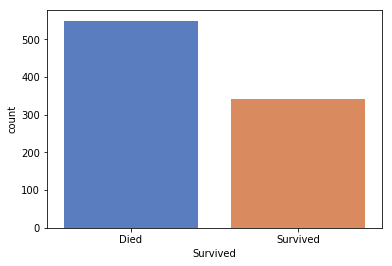

In [11]:
sns.countplot(data['Survived'], palette ='muted');

Survived  Died  Survived
Sex                     
female      81       233
male       468       109


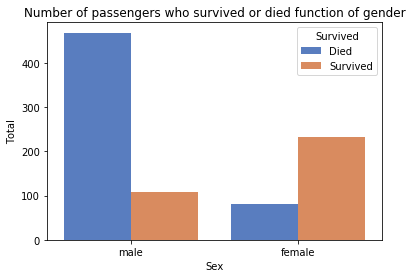

In [12]:
print(pd.crosstab(data['Sex'],data['Survived']))
ax = sns.countplot(x = 'Sex', hue = 'Survived', palette = 'muted', data = data)
ax.set(title = 'Number of passengers who survived or died function of gender', 
       xlabel = 'Sex', ylabel = 'Total')
plt.show()

Survived  Died  Survived
Pclass                  
1           80       136
2           97        87
3          372       119


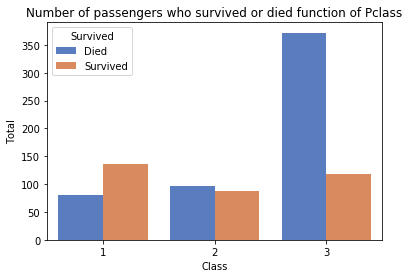

In [13]:
print(pd.crosstab(data['Pclass'],data['Survived']))
ax = sns.countplot(x = 'Pclass', hue = 'Survived', palette = 'muted', data = data)
ax.set(title = 'Number of passengers who survived or died function of Pclass', 
       xlabel = 'Class', ylabel = 'Total')
plt.show()

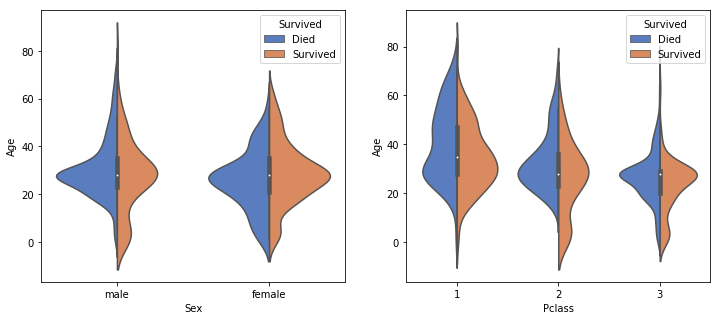

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, 
               split=True, palette='muted');

plt.subplot(1,2,2)
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, 
               split=True, palette='muted');

[Text(0.5, 1.0, 'Age distribution in different class')]

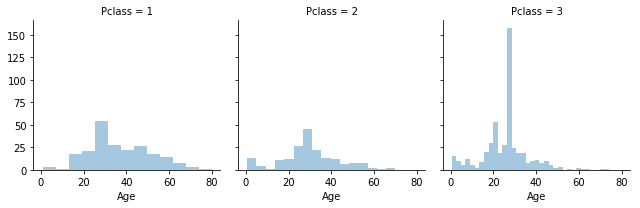

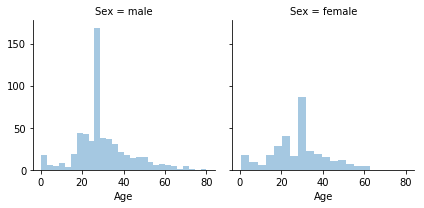

In [15]:
g = sns.FacetGrid(data, col='Pclass')
g.map(sns.distplot, 'Age',kde=False);
ax.set(title='Age distribution in different class')

g = sns.FacetGrid(data, col='Sex')
g.map(sns.distplot, 'Age',kde=False)
ax.set(title='Age distribution in different class')

In [16]:
# Replace strings by integers
data.Sex.replace(('male','female'), (0,1), inplace = True)
data.Embarked.replace(('S','C','Q'), (0,1,2), inplace = True)
data.Survived.replace(('Died','Survived'), (0,1), inplace = True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


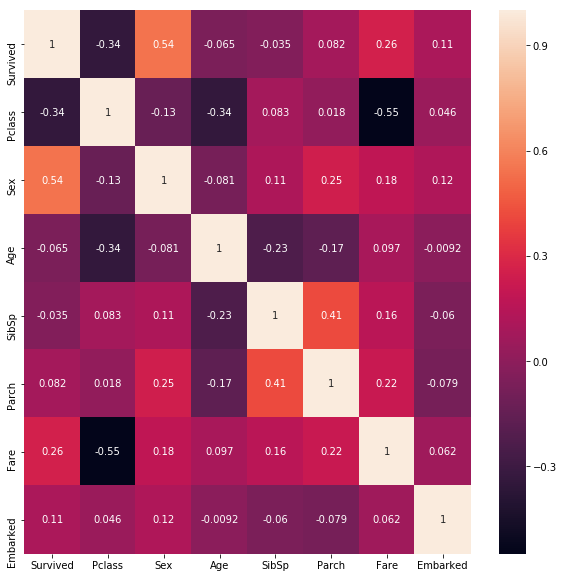

In [17]:
# Plot correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(data.astype(float).corr(), annot=True)
plt.show()

In [18]:
X = data.iloc[:,1:].astype(float)
y = data.iloc[:,0].astype(float)

In [19]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X_train = scale(X_train)
X_test = scale(X_test)

## Random forest with randomized search cross validation

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in the forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# number of features to consider when looking for the best split
max_features = ['auto', 'sqrt']

# Maximum depth of the tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split an internal node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}
print('Random grid :', grid)

Random grid : {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [22]:
# Create base model
rf = RandomForestClassifier()

# Random search, using 3 fold cross validation, search 100 combination
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [23]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [24]:
print("Best score with random forest classifier :", rf_random.best_score_)

Best score with random forest classifier : 0.827247191011236


In [25]:
print("Score on test set : ", rf_random.score(X_test,y_test))

Score on test set :  0.7821229050279329


## SVC with randomized search cross validation

In [26]:
kernel = ['linear', 'rbf','poly']
gamma = [0.0001,0.001,0.01,0.01,0.1,1]
C = [1,10,100,1000]

# Create the random grid
grid = {'kernel': kernel,
        'gamma': gamma,
        'C': C}
        
print('SVM random grid :', grid)

SVM random grid : {'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.01, 0.1, 1], 'C': [1, 10, 100, 1000]}


In [27]:
svc = SVC()
svc_random = RandomizedSearchCV(estimator = svc, param_distributions = grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
svc_random.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


c:\users\antoi\onedrive\bureau\environnements\mlearning\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 12.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.01, 0.1, 1], 'C': [1, 10, 100, 1000]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [28]:
svc_random.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 1}

In [29]:
print("Best score with SVC :", svc_random.best_score_)

Best score with SVC : 0.827247191011236


In [30]:
print("Score on test set :", svc_random.score(X_test,y_test))

Score on test set : 0.8100558659217877


## KNN

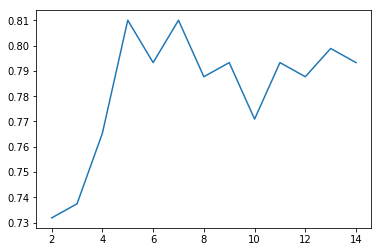

Optimal nb neihbors: 5
(712, 7)


In [31]:
from sklearn.neighbors import KNeighborsClassifier
accuracy = []

for k in range(2,15):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    accuracy.append(knn.score(X_test,y_test))

plt.plot(range(2,15),accuracy)
plt.show()
print("Optimal nb neihbors:", np.argmax(accuracy)+2)
print(X_train.shape)

In [32]:
arg_max = np.argmax(accuracy)
k = arg_max + 2
knn_optimized = KNeighborsClassifier(k)
knn_optimized.fit(X_train,y_train)
print("Best score with KNN : ", knn_optimized.score(X_test,y_test))

Best score with KNN :  0.8100558659217877


## Submission

In [33]:
data_test = pd.read_csv("test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
print("Data test shape:",data_test.shape)
data_test.isnull().sum()

Data test shape: (418, 11)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
# Check NaN value
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [36]:
# Replace NaN value with median age of train set
data_test['Age'] = data_test['Age'].fillna(data['Age'].median())
data_test['Fare'] = data_test['Fare'].fillna(data['Fare'].median())

In [37]:
# Replace strings by integers
data_test.Sex.replace(('male','female'), (0,1), inplace = True)
data_test.Embarked.replace(('S','C','Q'), (0,1,2), inplace = True)
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


In [38]:
# Remove the same feature as in the training set 
data_test = data_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
data_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [39]:
X = data_test.iloc[:,:].values
pred = rf_random.predict(X).astype(int)

In [40]:
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = pred
df_output[['PassengerId','Survived']].to_csv('pred4.csv', index=False)